In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import seaborn as sns
from cmcrameri import cm

mpl.rcParams['lines.markersize']=10
mpl.rcParams['axes.titlesize']=30
mpl.rcParams['legend.fontsize']=20
mpl.rcParams['xtick.labelsize']=15
mpl.rcParams['ytick.labelsize']=15
mpl.rcParams['axes.labelsize']=20

mu=1.0
dt=0.01   
model_dim=3
model_name='L96'

# making the state noisy
noise_cov=mu*np.eye(model_dim)
spr=1
t_start=0
t_stop=5000

In [2]:
# Change to data path
os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L96/noise_sensitivity/mu={}'.format(mu))
start_idx=3000+2000 # starting point of the interval of clv( 25000+10000)
base_traj=np.load('State_g={}.npy'.format(dt))[start_idx:start_idx+t_stop]

In [3]:
# CLVs about the true state
base_type='State'
C=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]

print(C.shape)
print(G.shape)
print(base_traj.shape)
V=np.zeros_like(G)
for i in range(G.shape[0]):
    V[i]=G[i]@C[i]    

(5000, 3, 3)
(5000, 3, 3)
(5000, 3)


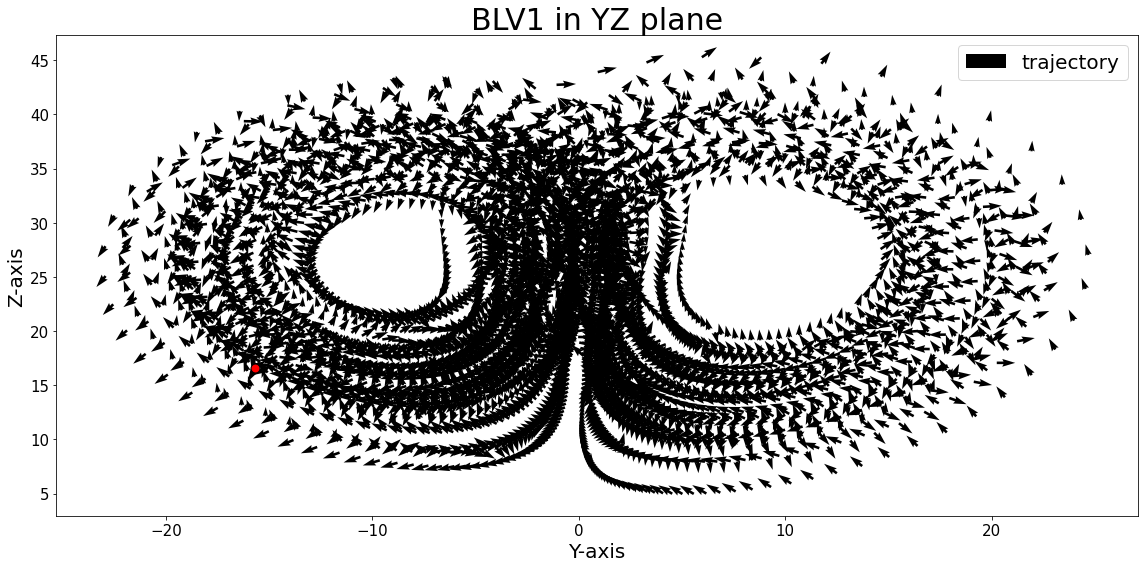

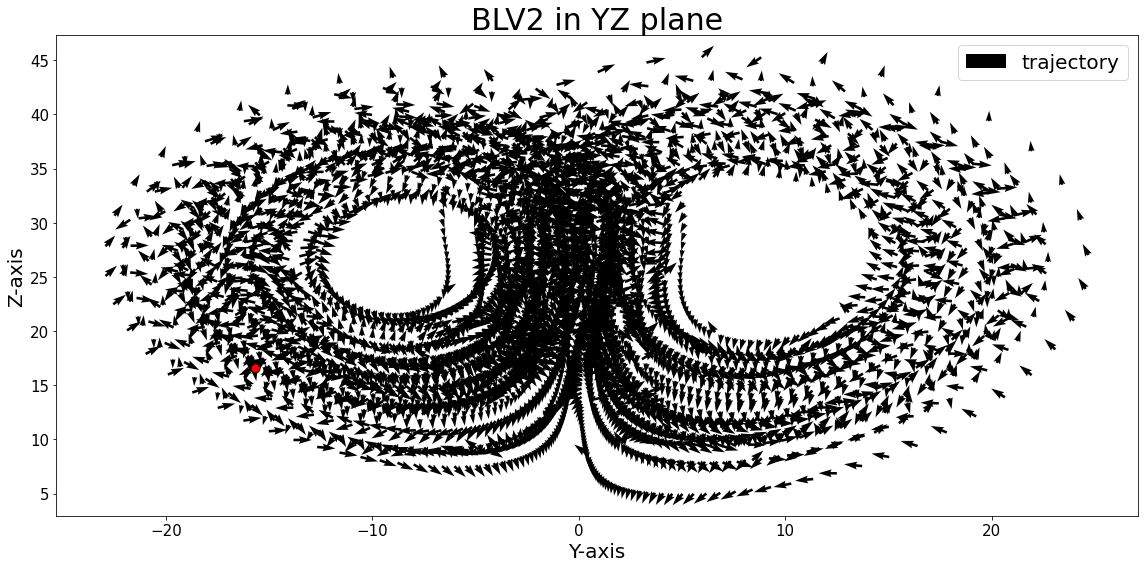

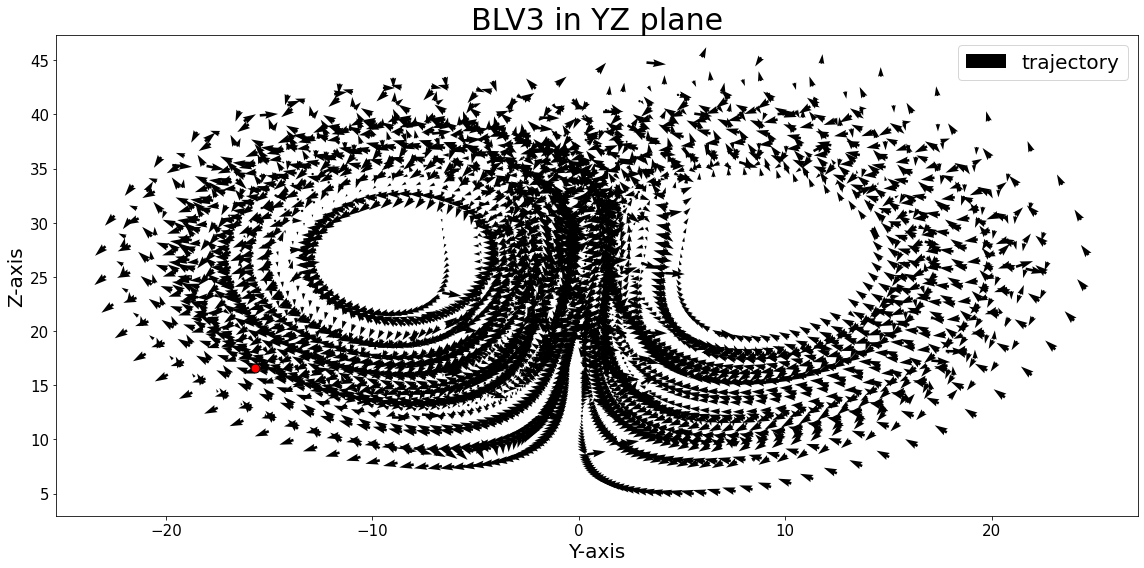

In [4]:
clv_index=0
num_clv=3
plot_pairs=[[1,2]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V[::spr,l,clv_index],V[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='trajectory')
        ax.scatter(base_traj[0,l],base_traj[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('BLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

## We now plot the noisy state clvs

In [108]:
# CLVs about the true state
mu=9.0
base_type='state_noisy'
os.chdir('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/data/L63_clvs/noisy_state/mu={}'.format(mu))
C2=np.load('matrices_c_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
G2=np.load('matrices_g_{}_model_{}_{}.npy'.format(model_dim,model_name,base_type))[t_start:t_stop]
noisy_traj=np.load('{}_g={}_mu={}.npy'.format(base_type,dt,mu))[10000+t_start:10000+t_stop]

print(C2.shape)
print(G2.shape)
print(noisy_traj.shape)
V2=np.zeros_like(G)
for i in range(G.shape[0]):
    V2[i]=G2[i]@C2[i]   

(5000, 3, 3)
(5000, 3, 3)
(5000, 3)


In [109]:
noisy_traj.shape

(5000, 3)

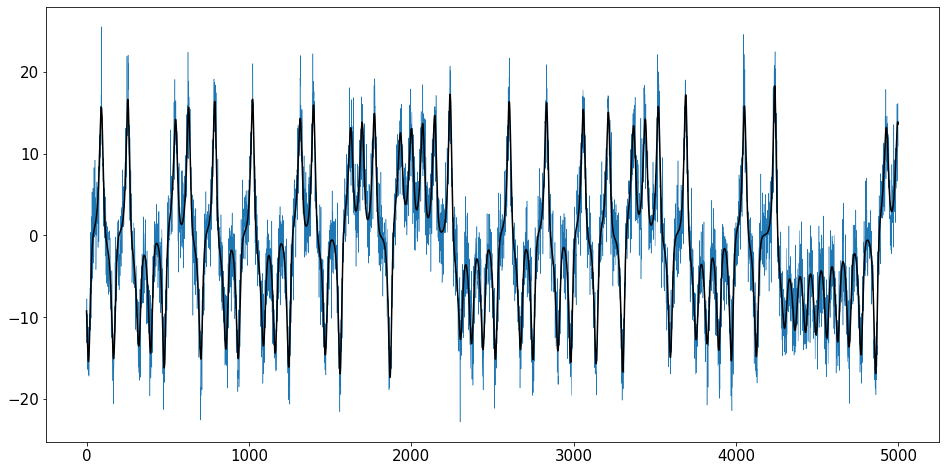

In [110]:
plt.figure(figsize=(16,8))
#plt.plot(np.arange(base_traj.shape[0]),np.linalg.norm(base_traj-noisy_traj,axis=1),linestyle='solid',alpha=0.5)
plt.plot(np.arange(base_traj.shape[0]),noisy_traj[:,0],lw=0.5)
plt.plot(np.arange(base_traj.shape[0]),base_traj[:,0],c='black')

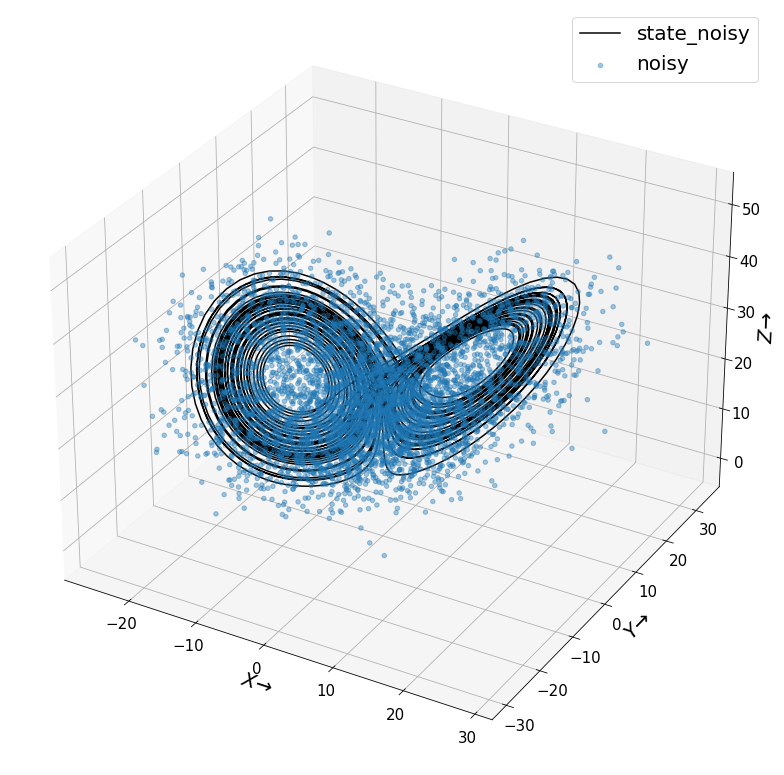

In [48]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# plotting
ax.scatter(noisy_traj[:,0],noisy_traj[:,1],noisy_traj[:,2],label='noisy',alpha=0.4)
ax.plot3D(base_traj[:,0],base_traj[:,1],base_traj[:,2],label='{}'.format(base_type),c='black')

ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
plt.legend()

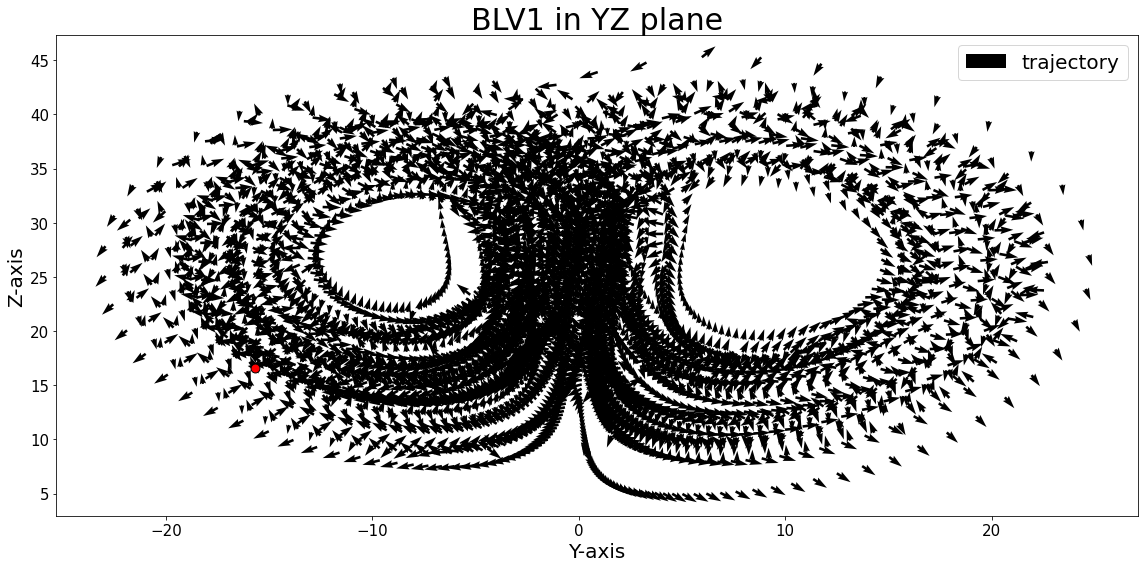

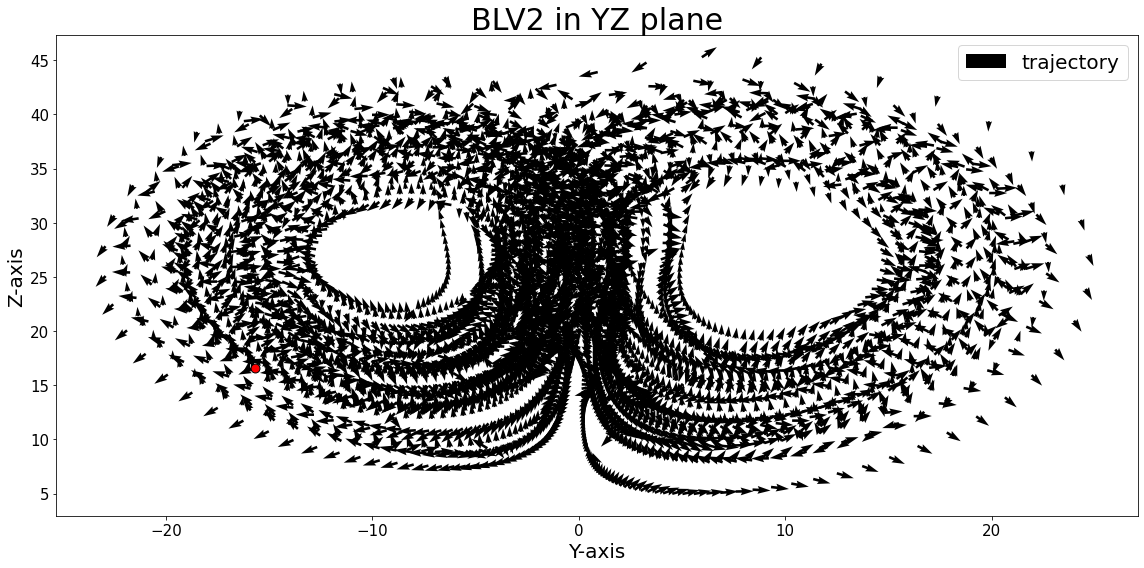

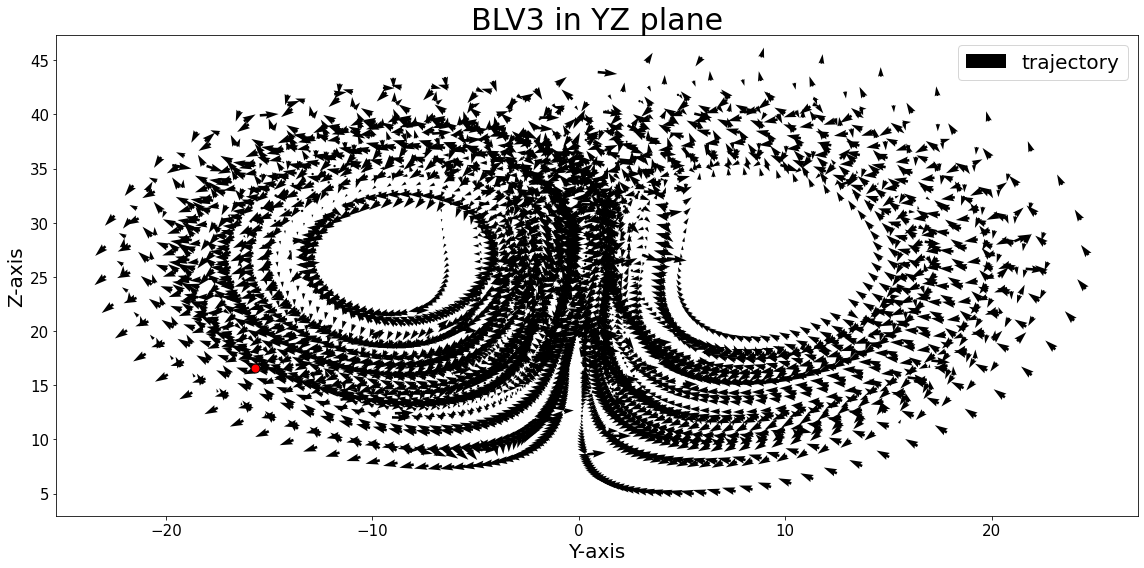

In [17]:
clv_index=0
num_clv=3
plot_pairs=[[1,2]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V2[::spr,l,clv_index],V2[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='trajectory')
        ax.scatter(base_traj[0,l],base_traj[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('BLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

In [ ]:
# Difference not vissible, so plot overlap for single one

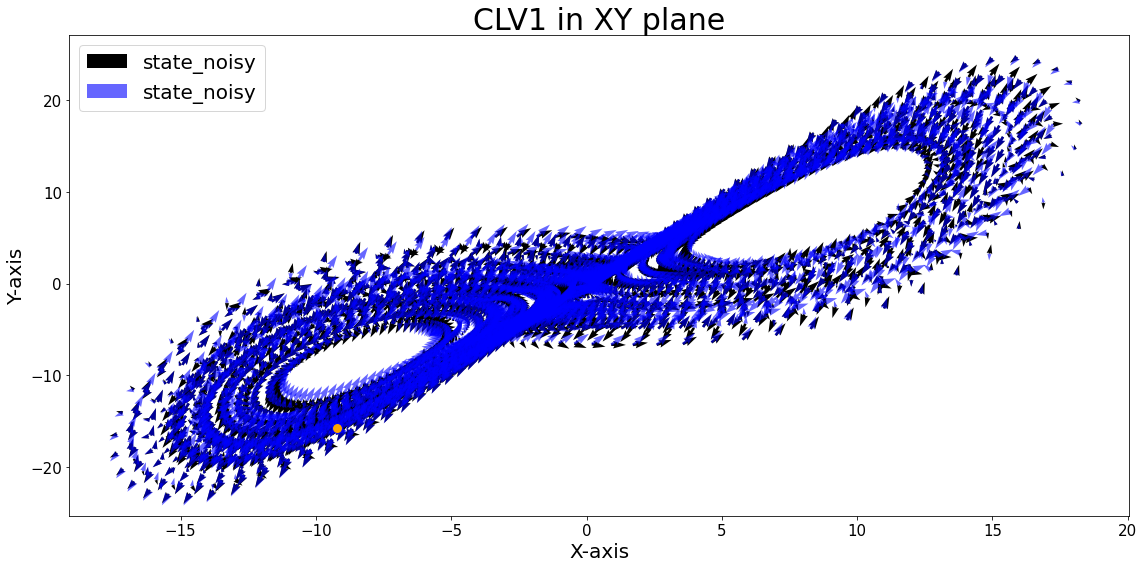

In [56]:
# Plot the two at same clv index
base_type1='state_noisy'
num_clv=1
spr=1
plot_pairs=[[0,1]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V[::spr,l,clv_index],V[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='{}'.format(base_type))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],V2[::spr,l,clv_index],V2[::spr,m,clv_index],scale_units='xy',scale=1.0,color='blue',label='{}'.format(base_type1),alpha=0.6)        
        ax.scatter(base_traj[0,l],base_traj[0,m],c='orange',s=100,edgecolors='blue')
        #ax.scatter(traj[0,l],traj1[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('CLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

In [111]:
# To check, average errors over the interval for which clv is calculated. And the cosine of the angle between them
# and the 
l2_error=np.arange(base_traj.shape[0])
l2_error=np.linalg.norm(noisy_traj-base_traj,axis=1)
cosines=np.zeros((base_traj.shape[0],3))
for i in range(base_traj.shape[0]):
    for j in range(3):
        cosines[i,j]=np.abs(np.dot(V[i,:,j],V2[i,:,j]))

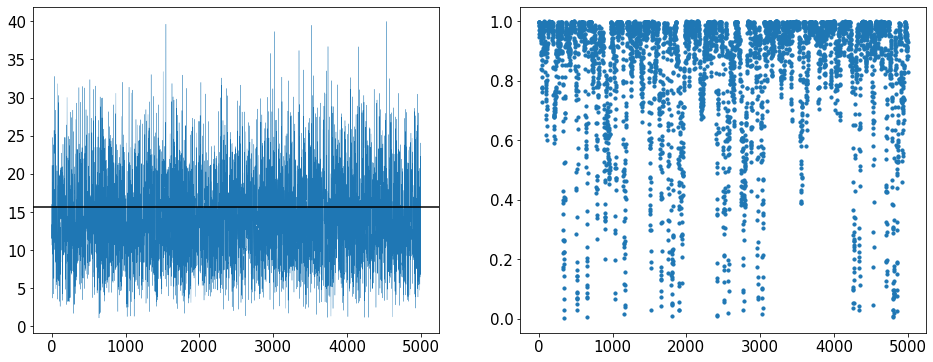

In [91]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(np.arange(len(l2_error)),l2_error,lw=0.3)
plt.axhline(y=np.sqrt(mu*model_dim),c='black')
plt.subplot(1,2,2)
plt.scatter(np.arange(len(l2_error)),cosines[:,0],s=10)

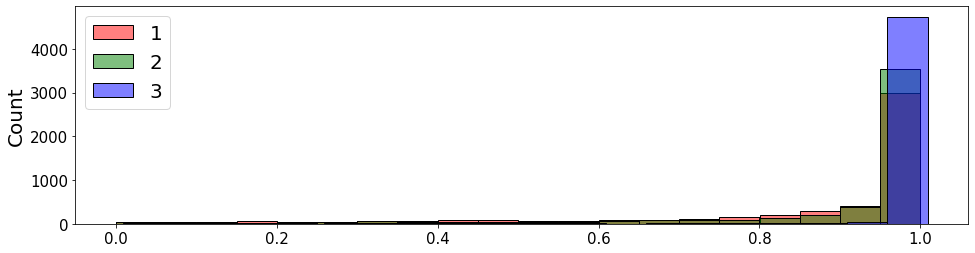

In [124]:
plt.figure(figsize=(16,4))
colors=['r','g','b']
#plt.subplot(1,2,1)
#plt.yscale('log')
#plt.xscale('log')
for i in range(3):
    sns.histplot(x=cosines[:,i],binwidth=0.05,fill=True,color=colors[i],alpha=0.5,label='{}'.format(i+1))
plt.legend()

    #sns.histplot(x=cosines[i],bins=np.linspace(0.9,1,200),label='{}'.format(i+1))
#plt.subplot(1,2,2)
#plt.plot(np.arange(len(l2_error)),cosines,lw=0.5)

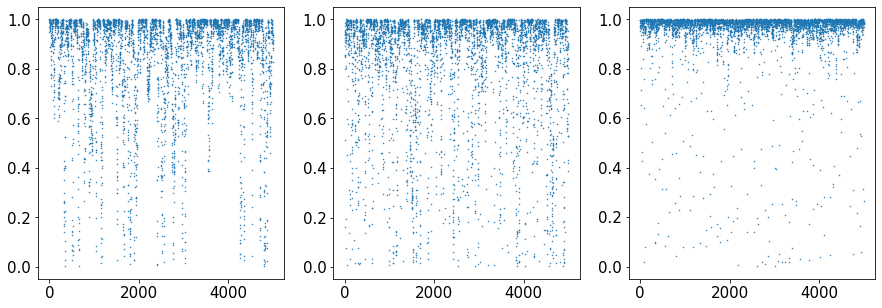

In [87]:
# result to think about why we have this ....
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.plot(np.arange(len(l2_error)),cosines[:,0],'.',ms=1.0)
plt.subplot(132)
plt.plot(np.arange(len(l2_error)),cosines[:,1],'.',ms=1.0)
plt.subplot(133)
plt.plot(np.arange(len(l2_error)),cosines[:,2],'.',ms=1.0)

In [38]:
ct0 = (1.0 - np.abs(cosines[:,0])) > 0.05
ct1 = (1.0 - np.abs(cosines[:,1])) > 0.05
ct2 = (1.0 - np.abs(cosines[:,2])) > 0.05
n0 = np.sum(ct0)
n1 = np.sum(ct1)
n2 = np.sum(ct2)
print(n0,n1,n2)

1419 1386 242


In [71]:
# Statistics of the error over time
means=np.mean(cosines,axis=0)
variances=np.var(cosines,axis=0)
print(means)
print(variances)

[0.90773137 0.8970013  0.98086214]
[0.03840376 0.04613739 0.00934818]


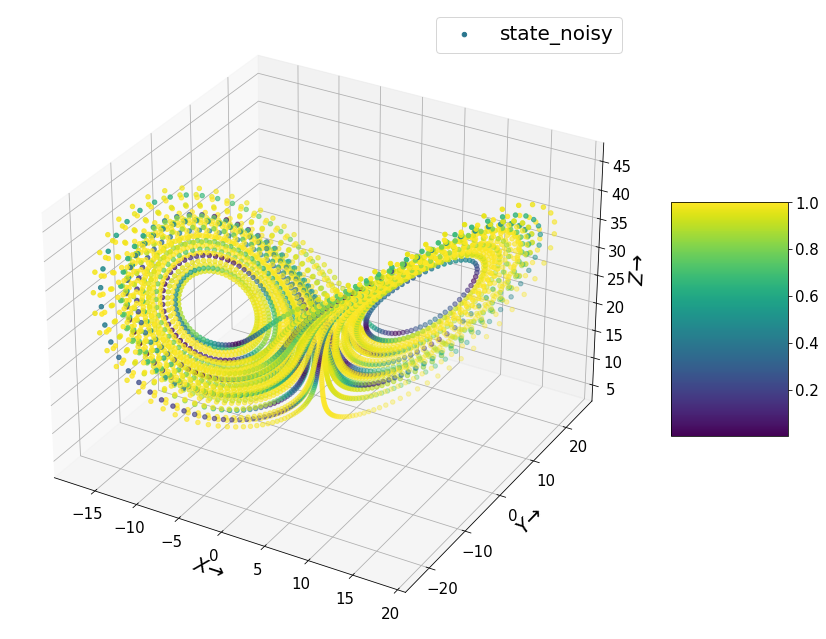

In [152]:
#plot the state and the trajectory
fig = plt.figure(figsize=(14,14))

# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(base_traj[:,0],base_traj[:,1],base_traj[:,2],c=cosines[:,0],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
fig.colorbar(my_scatter,shrink=0.5, aspect=2)
plt.legend()

In [ ]:
# Relative angle between clvs for L63 at different points in phase space

In [4]:
cosines_rel=np.zeros((base_traj.shape[0],3))
combs=[[0,1],[1,2],[0,2]]
for i in range(base_traj.shape[0]):
    for j,k in enumerate(combs):
        cosines_rel[i,j]=(np.dot(V[i,:,k[0]],V[i,:,k[1]]))

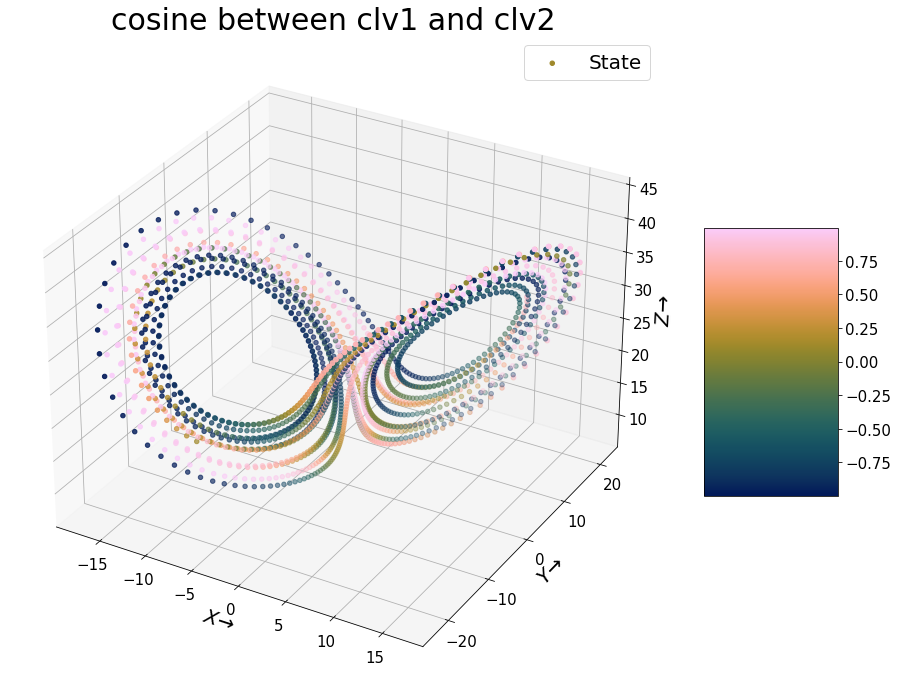

In [21]:
#plot the state and the trajectory
fig = plt.figure(figsize=(16,12))

t1=0
t2=2000
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
#my_scatter=ax.scatter(base_traj[:,0],base_traj[:,1],base_traj[:,2],c=cosines_rel[:,0],label='{}'.format(base_type),cmap='viridis')
my_scatter=ax.scatter(base_traj[t1:t2,0],base_traj[t1:t2,1],base_traj[t1:t2,2],c=C[t1:t2,0,1]*C[t1:t2,0,0],label='{}'.format(base_type),cmap=cm.batlow)
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
ax.set_title('cosine between clv{} and clv{}'.format(1,2))
fig.colorbar(my_scatter,shrink=1.0, aspect=2)
plt.legend()

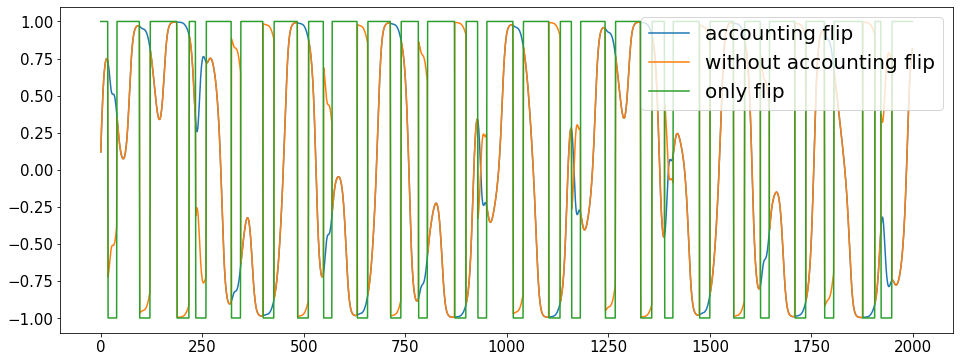

In [36]:
#  Looking at the variation of angles between clv 1 and 2 over time
plt.figure(figsize=(16,6))
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,1]*C[t1:t2,0,0],label='accounting flip')
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,1],label='without accounting flip')
plt.plot(np.arange(cosines_rel.shape[0])[t1:t2],C[t1:t2,0,0],label='only flip')
plt.legend(loc='upper right')


In [ ]:
# 


In [37]:
# If you plot the angle between the BLVs which are by construction orthogonal, you dont have any such structure.
cosines2=np.zeros((base_traj.shape[0],3))
for i in range(base_traj.shape[0]):
    for j in range(3):
        cosines2[i,j]=np.absolute(np.dot(G[i,:,j],G2[i,:,j]))

NameError: name 'G2' is not defined

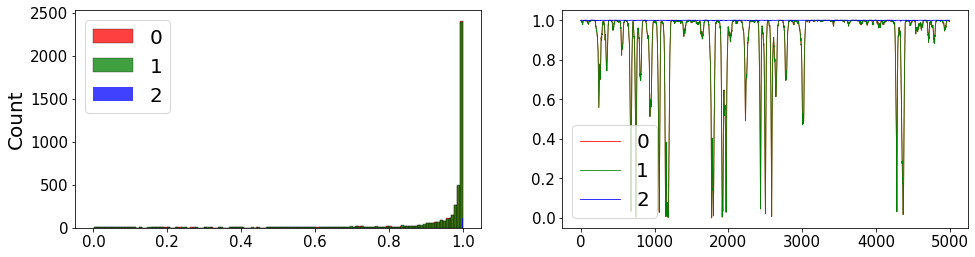

In [147]:
plt.figure(figsize=(16,4))
colors=['r','g','b']
plt.subplot(1,2,1)
for i in range(3):
    sns.histplot(x=cosines2[:,i],fill=True,color=colors[i],label='{}'.format(i))

plt.legend()
plt.subplot(1,2,2)
for i in range(3):
    plt.plot(np.arange(len(l2_error)),cosines2[:,i],label='{}'.format(i),lw=0.8,c=colors[i])
plt.legend()

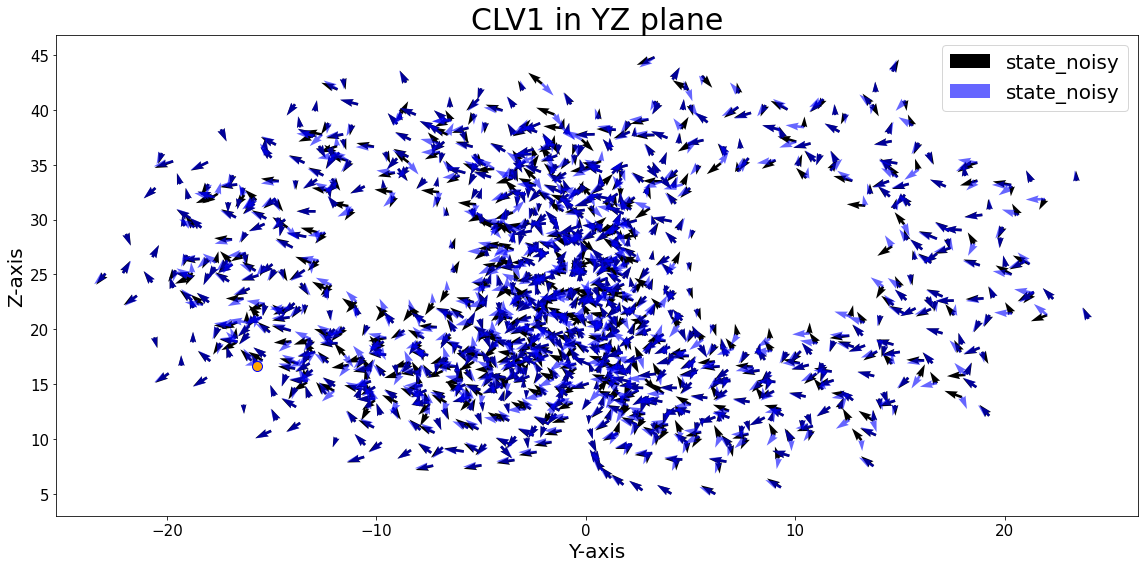

In [138]:
# Plot the two at same clv index
base_type1='state_noisy'
num_clv=1
spr=4
plot_pairs=[[1,2]]
for clv_index in range(num_clv):
    for l,m in plot_pairs:
        fig, ax = plt.subplots(figsize=(16,8))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],G[::spr,l,clv_index],G[::spr,m,clv_index],scale_units='xy',scale=1.0,color='black',label='{}'.format(base_type))
        ax.quiver(base_traj[::spr,l],base_traj[::spr,m],G2[::spr,l,clv_index],G2[::spr,m,clv_index],scale_units='xy',scale=1.0,color='blue',label='{}'.format(base_type1),alpha=0.6)        
        ax.scatter(base_traj[0,l],base_traj[0,m],c='orange',s=100,edgecolors='blue')
        #ax.scatter(traj[0,l],traj1[0,m],c='r',s=80,edgecolors='black')
        ax.set_title('CLV{} in {}{} plane'.format(clv_index+1,coord[l],coord[m]))
        ax.set_xlabel('{}-axis'.format(coord[l]))
        ax.set_ylabel('{}-axis'.format(coord[m]))
        plt.legend()
        plt.tight_layout()

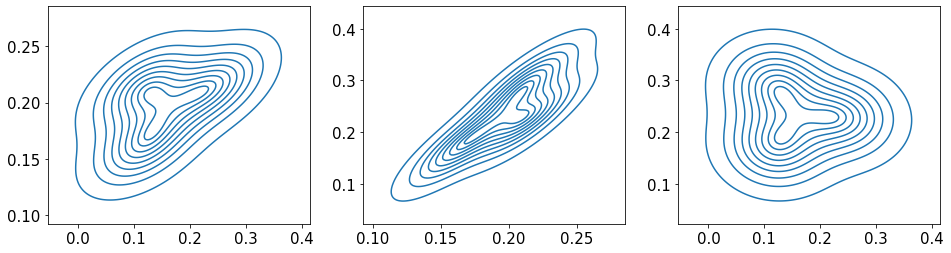

In [84]:
combs=[[0,1],[1,2],[0,2]]
fig=plt.subplots(1,3,figsize=(16,4))
for i,j in enumerate(combs):
    plt.subplot(1,3,i+1)
    sns.kdeplot(x=cosines_rel[j[0]],y=cosines_rel[j[1]])    

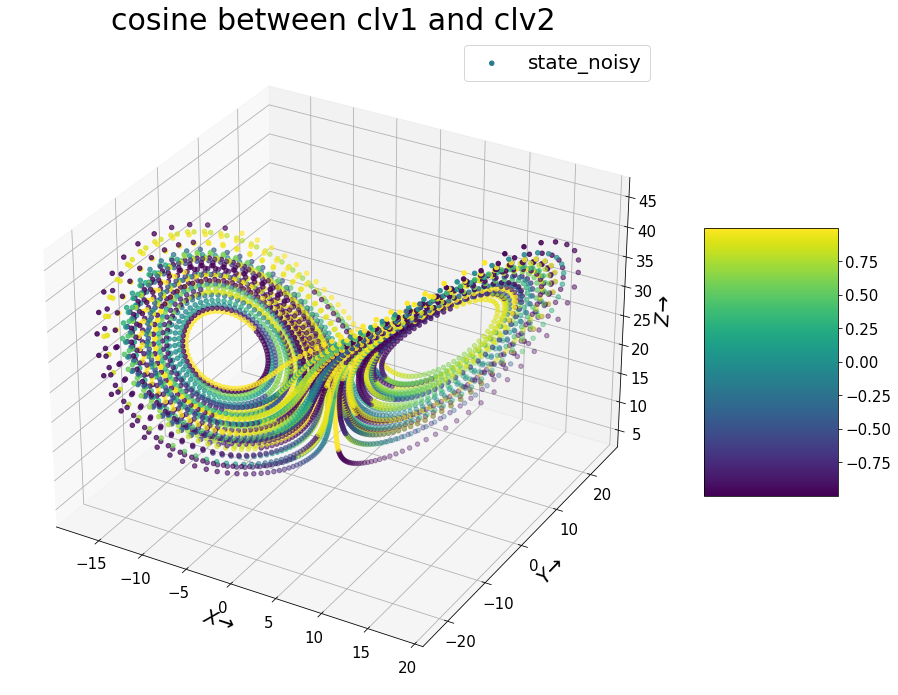

In [182]:
# If we can study the degree of homogeneity of these vectors on the phase space
fig = plt.figure(figsize=(16,12))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
my_scatter=ax.scatter(base_traj[:,0],base_traj[:,1],base_traj[:,2],c=C2[:,0,1],label='{}'.format(base_type),cmap='viridis')
ax.set_xlabel(r'$X\to$')
ax.set_ylabel(r'$Y\to$')
ax.set_zlabel(r'$Z\to$')
ax.set_title('cosine between clv{} and clv{}'.format(1,2))
fig.colorbar(my_scatter,shrink=1.0, aspect=2)
plt.legend()

In [ ]:
# We must show something more,

In [115]:
a=np.arange(5)
a[-1]

4

IndexError: index 5 is out of bounds for axis 0 with size 5

In [143]:
e=np.load('/home/shashank/Documents/Data Assimilation/ENKF_for_CLVs/codes/clv_calculation/lexp_T=1000_dt=0.02.npy')

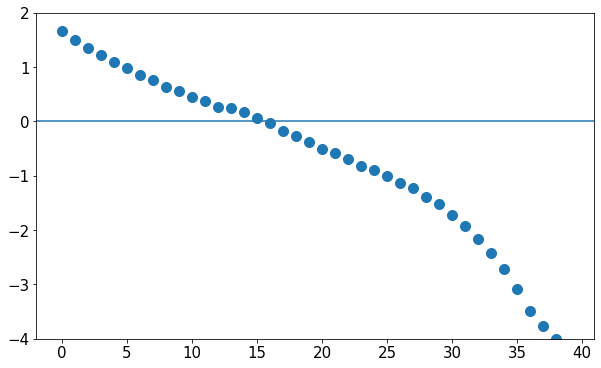

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(40),e)
plt.ylim(-4,2)
plt.axhline(0)

In [152]:
spectral_gap=e-np.roll(e,-1)

In [154]:
spectral_gap

array([ 0.17181993,  0.14183493,  0.13793721,  0.1238627 ,  0.10361722,
        0.13871518,  0.08624392,  0.12303347,  0.08177881,  0.11036354,
        0.07581547,  0.10503605,  0.02912842,  0.0647063 ,  0.10809056,
        0.08774396,  0.14695104,  0.09758746,  0.10927299,  0.12577198,
        0.07214951,  0.11593921,  0.12856404,  0.0797685 ,  0.11242957,
        0.11326056,  0.10920631,  0.16034173,  0.1274473 ,  0.19532448,
        0.20684524,  0.23153489,  0.2601153 ,  0.30701177,  0.36316436,
        0.40477486,  0.27040717,  0.24134447,  0.21937291, -5.88831331])